In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

df_m = pd.read_csv("ForbesAtletesMoney.csv")
df_m2 = df_m
df_m
#ideas, $ for certain time periods (no sport), $ trend for athletes back then to now,
# $ trend in certain sports over the years, $ avg in nationality.
 #df_m.plot('Year', 'Earnings_in_millions', kind='bar', ax = ax)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [21]:
#Cleaning the Data
#df_m["Sport"][26] = "NFL", NBA, NASCAR(auto racing, F1 Motors, F1 racing)
index = 0
while index < len(df_m):
    if df_m["Sport"][index].upper() == "BASKETBALL":
        df_m2["Sport"][index] = "NBA"
        index +=1
    elif df_m["Sport"][index].upper() == "AMERICAN FOOTBALL":
        df_m2["Sport"][index] = "NFL"
        index+=1
    elif df_m["Sport"][index].upper() == "MOTORCYCLE GP" or df_m["Sport"][index].upper() == "AUTO RACING (NASCAR)" or df_m["Sport"][index].upper() == "AUTO RACING" or df_m["Sport"][index].upper() == "F1 MOTORSPORTS" or df_m["Sport"][index] == "F1 RACING":
        df_m2["Sport"][index] = "NASCAR"
        index+=1
    elif df_m["Sport"][index].upper() == "HOCKEY" or df_m["Sport"][index].upper() == "ICE HOCKEY":
        df_m["Sport"][index] = "NHL"
    else:
        df_m2["Sport"][index] = df_m["Sport"][index].upper()
        index+=1
#for x in df_m["Sport"]:
 #   print(x)
    

<ipython-input-21-6ca8cba3c65f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2["Sport"][index] = df_m["Sport"][index].upper()
<ipython-input-21-6ca8cba3c65f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2["Sport"][index] = "NASCAR"
<ipython-input-21-6ca8cba3c65f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2["Sport"][index] = "NBA"
<ipython-input-21-6ca8cba3c65f>:15: SettingWithCopyWarning: 
A value is trying

In [22]:
#These cell(s) will be for earnings in specific year ranges (i.e 1 decade), no sports
in_dec = df_m2["Year"] <= 2000
in_dec2 = 2000 < df_m2["Year"] 
in_dec3 = df_m2["Year"] <= 2010
in_dec4 = 2010 < df_m2["Year"]

dec1 = df_m2[in_dec]
dec2 = df_m2[in_dec2 & in_dec3]
dec4 = df_m2[in_dec4]
dec2["Year"]
index = 0
#for x in dec2["Sport"]:
 #   if x == "boxing":
#print(dec2["Year"].head()) 
#print(dec4["Year"].head())
#print(dec1["Year"].head())

23.77363636363636
The average earnings in this time frame was $23.774 million


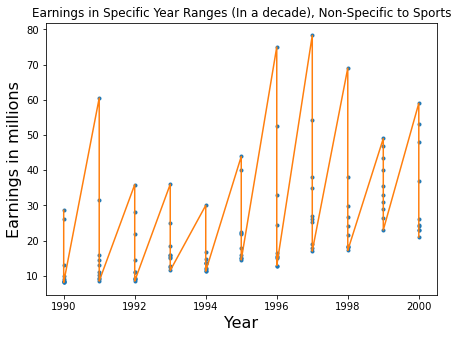

42.51978021978022
The average earnings in this time frame was $42.52 million


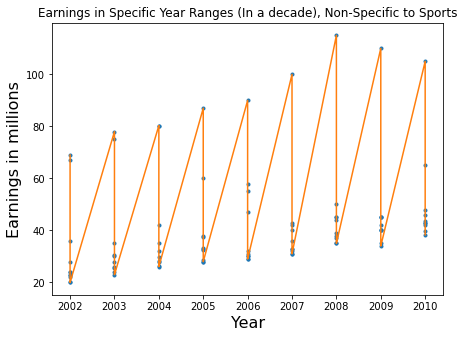

72.16
The average earnings in this time frame was $72.16 million


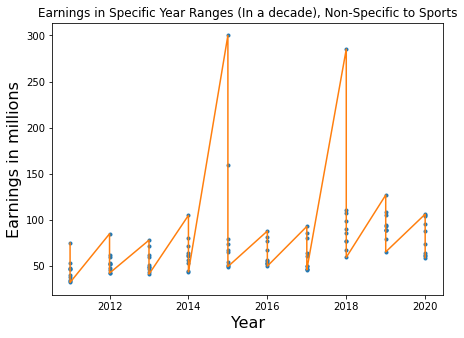

In [34]:
#Drawing Graph is data above
#takes 4 inputs, dec is the decade range, lst is the list of years, lst2 is the list of money, sport is a string. 
def draw_graph(dec, lst, lst2,sport):
    if len(lst) == 0:
        fig = plt.figure(figsize=(7,5))
        ax= fig.add_subplot(1,1,1)
        ax.plot(dec["Year"], dec["earnings ($ million)"], '.') #plots dots
        ax.plot(dec["Year"], dec["earnings ($ million)"]) #plots a line
        ax.set_xlabel('Year', fontsize=16)
        ax.set_ylabel('Earnings in millions', fontsize=16)
        ax.set_title("Earnings in Specific Year Ranges (In a decade), Non-Specific to Sports", fontsize=12)

        avg = 0
        amnt = 0
        for x in dec["earnings ($ million)"]:
            amnt += 1
            avg+=x
        print(avg/amnt)    
        print("The average earnings in this time frame was $"+ str(round(avg/len(dec["earnings ($ million)"]),3)) + " million")

        plt.show()
    else:
        fig = plt.figure(figsize=(7,5))
        ax= fig.add_subplot(1,1,1)
        ax.plot(lst, lst2, '.') #plots dots
        #ax.plot(lst_yr, lst_money) #plots a line
        ax.set_xlabel('Year', fontsize=16)
        ax.set_ylabel('Earnings in millions', fontsize=16)
        ax.set_title("Earnings For " + sport + " Over the Years", fontsize=12)

        avg = 0
        for x in lst2:
            avg+=x
        print("The average earnings in this time frame for "+ sport + " was $"+ str(round(avg/len(dec["earnings ($ million)"]),3)) + " million")

        #print(lst_yr)
        plt.show()
        
draw_graph(dec1,[],[],"")
draw_graph(dec2,[],[],"")
draw_graph(dec4,[],[],"")

In [24]:
#plt.bar(parr["Year"], parr["earnings_in_millions"], align='center', alpha=0.5)
#plt.xticks(parr["Year"], parr["earnings_in_millions"])
#plt.ylabel('Earnings in Millions')
#plt.title('Earnings in specific year ranges (i.e 1 decade), no sports')'''

The average earnings in this time frame for NFL was $0.341 million


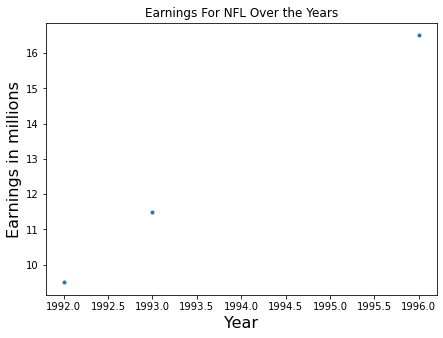

The average earnings in this time frame for NFL was $2.052 million


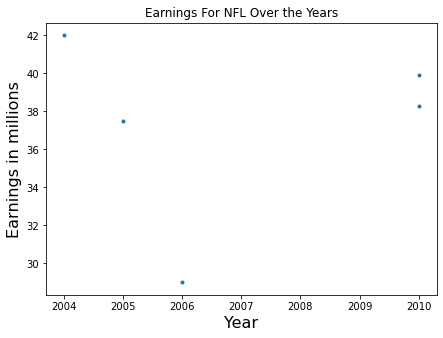

The average earnings in this time frame for NFL was $7.145 million


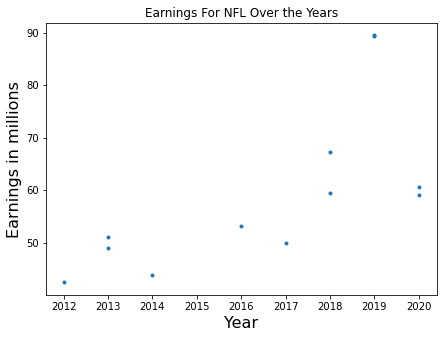

In [25]:
#$ trend in certain sports over the years
def sport_trend(sport,dec, cond):
    if cond == 1:
        index = 0
    elif cond == 2:
        index = 110
    elif cond == 3:
        index = 201
    lst_money = []
    lst_yr = []
    for x in dec["Sport"]:
        if x == sport:
            lst_money.append(dec["earnings ($ million)"][index])
            lst_yr.append(dec["Year"][index])
            index +=1
        else:
            index+=1
    lst_money = lst_money[::-1]
    lst_yr = lst_yr[::-1]
    draw_graph(dec,lst_yr,lst_money,sport)

sport_trend("NFL", dec1, 1)
sport_trend("NFL", dec2, 2)
sport_trend("NFL", dec4, 3)

In [26]:
df_m2.groupby("Nationality").count()

,S.NO,Name,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
Nationality,,,,,,,
Argentina,9,9,9,9,9,9,9
Australia,1,1,1,0,1,1,1
Austria,1,1,1,1,1,1,1
Brazil,9,9,9,8,9,9,9
Canada,6,6,6,6,6,6,6
Dominican,1,1,1,1,1,1,1
Filipino,1,1,1,1,1,1,1
Finland,3,3,3,3,3,3,3
France,3,3,3,2,3,3,3


In [27]:
#Finding $ trends depending on nationality (make graphs from then to now, bar graphs with highest individ from one race and
#cumulative of each race).
#initializing the nations list
lst_arg = []
lst_austrail = []
lst_austria = []
lst_bra = []
lst_can = []
lst_dom = []
lst_fil = []
lst_fin = []
lst_fra = []
lst_ger = []
lst_ire = []
lst_ita = []
lst_mex = []
lst_NI = []
lst_phil = []
lst_port = []
lst_rus = []
lst_ser = []
lst_spa = []
lst_swi = []
lst_UK = []
lst_USA = []

def nation_money(lst, loc):
    x = 0
    while x < len(df_m2):
        if df_m2["Nationality"][x] == loc:
            lst.append(df_m2["earnings ($ million)"][x])
            x+=1
        else:
            x+=1
nation_money(lst_USA, "USA")
nation_money(lst_bra, "Brazil")
print(lst_bra)

[10.0, 13.0, 22.0, 18.5, 31.0, 37.0, 90.0, 105.0, 95.5]
